In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
# Faturamente total
df["total_bill"].sum()

np.float64(4827.77)

In [ ]:
# Ticket médio
df["total_bill"].mean()

np.float64(19.78594262295082)

Parte 3 — Análises de negócio

In [ ]:
# Vendar por dia.
df.groupby("day")["total_bill"].sum().sort_values(ascending=False)

,total_bill
day,
Sat,1778.40
Sun,1627.16
Thur,1096.33
Fri,325.88


In [ ]:
# Vendas por turno
df.groupby("time")["total_bill"].sum()

,total_bill
time,
Dinner,3660.30
Lunch,1167.47


In [ ]:
# Fidelizados gastam mais?
df.groupby("smoker")["total_bill"].mean()

,total_bill
smoker,
No,19.188278
Yes,20.756344


Parte 4 — Métricas adicionais

In [ ]:
# Media de itens
df["size"].mean()

np.float64(2.569672131147541)

In [ ]:
# Percentual médio de desconto
(df["tip"] / df["total_bill"]).mean()

np.float64(0.16080258172250472)

<Axes: xlabel='day'>

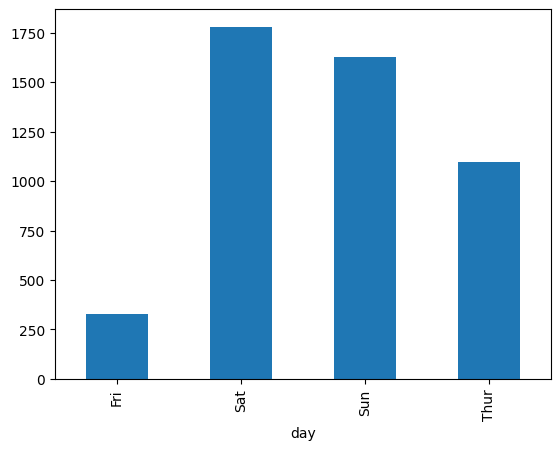

In [ ]:
df.groupby("day")["total_bill"].sum().plot(kind="bar")

<Axes: >

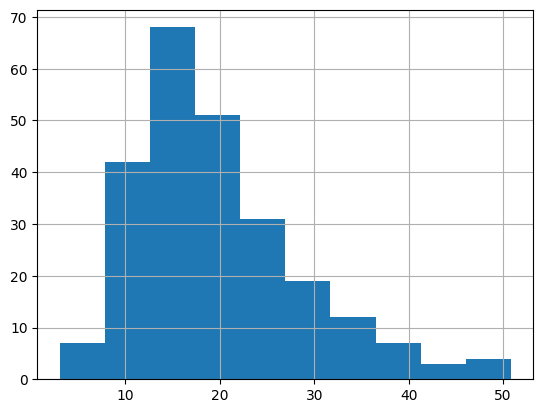

In [ ]:
df["total_bill"].hist()


Parte 6 — Nível Intermediário

In [ ]:
df["discount_rate"] = df["tip"] / df["total_bill"]

NameError: name 'df' is not defined

In [ ]:
df["ticket_category"] = pd.cut(
    df["total_bill"],
    bins=[0,10,20,30,100],
    labels=["baixo","medio","alto","premium"]
)

In [ ]:
df.groupby("ticket_category")["total_bill"].count()